# **Loading IMBD Dataset**

In [1]:
from keras.datasets import imdb

# Load the IMDB dataset
max_words  = 10000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=max_words)

In [2]:
from keras.preprocessing.sequence import pad_sequences

# Truncate or pad the reviews to a length of 150 words
maxlen = 150
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# Select 5000 samples for testing
test_data = test_data[:5000]
test_labels = test_labels[:5000]

# Select 10,000 samples for validation
val_data = test_data[:10000]
val_labels = test_labels[:10000]


# **Model Building**

In [3]:
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, BatchNormalization

# Build The RNN model
rnn_model = Sequential()

rnn_model.add(Embedding(10000, 32, input_length=len(train_data[0])))
rnn_model.add(Bidirectional(LSTM(64, return_sequences=True)))
rnn_model.add(Dropout(0.5))
rnn_model.add(BatchNormalization())
rnn_model.add(Bidirectional(LSTM(32)))
rnn_model.add(Dropout(0.5))
rnn_model.add(BatchNormalization())
rnn_model.add(Dense(1, activation='sigmoid'))
rnn_model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

# Print model summary
print(" ")
print("RNN Model Architecture:")
print(rnn_model.summary())
print(" ")

 
RNN Model Architecture:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 32)           320000    
                                                                 
 bidirectional (Bidirection  (None, 150, 128)          49664     
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 150, 128)          0         
                                                                 
 batch_normalization (Batch  (None, 150, 128)          512       
 Normalization)                                                  
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                              

In [4]:
import numpy as np

# Load GloVe word embeddings
embeddings_index = {}
with open('glove.6B.100d.txt') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

embedding_dim = 100
embedding_matrix = np.zeros((10000, embedding_dim))
for i, word in enumerate(embeddings_index.keys()):
    if i < 10000:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

# Define the model with pretrained word embeddings
rnn_model_pretrained = Sequential()
rnn_model_pretrained.add(Embedding(10000, embedding_dim, input_length=maxlen, trainable=False))
rnn_model_pretrained.add(Bidirectional(LSTM(64, return_sequences=True)))
rnn_model_pretrained.add(Dropout(0.5))
rnn_model_pretrained.add(BatchNormalization())
rnn_model_pretrained.add(Bidirectional(LSTM(32)))
rnn_model_pretrained.add(Dropout(0.5))
rnn_model_pretrained.add(BatchNormalization())
rnn_model_pretrained.add(Dense(1, activation='sigmoid'))
rnn_model_pretrained.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

# Print model summary
print(" ")
print("RNN Model Pre Trained Architecture:")
print(rnn_model_pretrained.summary())
print(" ")

 
RNN Model Pre Trained Architecture:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 bidirectional_2 (Bidirecti  (None, 150, 128)          84480     
 onal)                                                           
                                                                 
 dropout_2 (Dropout)         (None, 150, 128)          0         
                                                                 
 batch_normalization_2 (Bat  (None, 150, 128)          512       
 chNormalization)                                                
                                                                 
 bidirectional_3 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                

# **For 100 Training Samples**

In [5]:
# Select the first 100 samples for training
train_data_100 = train_data[:100]
train_labels_100 = train_labels[:100]

Epoch 1/10
4/4 [==============================] - 17s 1s/step - loss: 0.8634 - accuracy: 0.4900 - val_loss: 0.6926 - val_accuracy: 0.5142
Epoch 2/10
4/4 [==============================] - 3s 980ms/step - loss: 0.6331 - accuracy: 0.6800 - val_loss: 0.6925 - val_accuracy: 0.5142
Epoch 3/10
4/4 [==============================] - 3s 1s/step - loss: 0.5005 - accuracy: 0.7700 - val_loss: 0.6927 - val_accuracy: 0.5142
Epoch 4/10
4/4 [==============================] - 3s 980ms/step - loss: 0.3002 - accuracy: 0.8900 - val_loss: 0.6928 - val_accuracy: 0.5142
Epoch 5/10
4/4 [==============================] - 3s 1s/step - loss: 0.2927 - accuracy: 0.8800 - val_loss: 0.6931 - val_accuracy: 0.5142
Epoch 6/10
4/4 [==============================] - 3s 1s/step - loss: 0.2121 - accuracy: 0.9600 - val_loss: 0.6934 - val_accuracy: 0.5142
Epoch 7/10
4/4 [==============================] - 3s 946ms/step - loss: 0.1499 - accuracy: 0.9800 - val_loss: 0.6924 - val_accuracy: 0.5142
Epoch 8/10
4/4 [===============

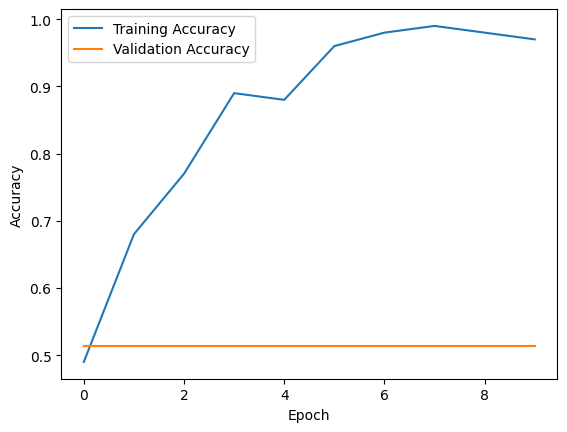

 
Loss : 
 


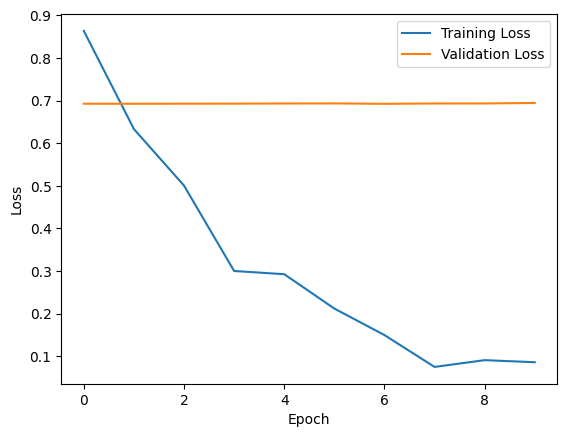

In [6]:
# Train the RNN model
rnn_model_100 = rnn_model
rnn_history_100 = rnn_model_100.fit(train_data_100, train_labels_100, epochs=10, batch_size=32, validation_data=(val_data, val_labels))

# Evaluate the model
test_loss_rnn100, test_accuracy_rnn100 = rnn_model_100.evaluate(test_data, test_labels)

print("Test Loss : ", test_loss_rnn100)
print("Test Accuracy : ", test_accuracy_rnn100)


#Model Perfomance Evaluation
import matplotlib.pyplot as plt

print(" ")
print("Perfomance of RNN Model for 100 Training Samples : ")
print(" ")
# Plot training and validation accuracy
print("Accuracy : ")
print(" ")
plt.plot(rnn_history_100.history['accuracy'], label='Training Accuracy')
plt.plot(rnn_history_100.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
print(" ")
print("Loss : ")
print(" ")
plt.plot(rnn_history_100.history['loss'], label='Training Loss')
plt.plot(rnn_history_100.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/10
4/4 [==============================] - 14s 1s/step - loss: 0.8859 - accuracy: 0.5000 - val_loss: 0.6927 - val_accuracy: 0.5142
Epoch 2/10
4/4 [==============================] - 2s 520ms/step - loss: 0.6763 - accuracy: 0.6000 - val_loss: 0.6934 - val_accuracy: 0.5142
Epoch 3/10
4/4 [==============================] - 3s 878ms/step - loss: 0.6769 - accuracy: 0.5900 - val_loss: 0.6935 - val_accuracy: 0.5142
Epoch 4/10
4/4 [==============================] - 2s 766ms/step - loss: 0.6276 - accuracy: 0.6600 - val_loss: 0.6938 - val_accuracy: 0.5142
Epoch 5/10
4/4 [==============================] - 2s 776ms/step - loss: 0.5391 - accuracy: 0.7400 - val_loss: 0.6956 - val_accuracy: 0.5142
Epoch 6/10
4/4 [==============================] - 2s 807ms/step - loss: 0.5283 - accuracy: 0.7100 - val_loss: 0.6970 - val_accuracy: 0.5142
Epoch 7/10
4/4 [==============================] - 3s 1s/step - loss: 0.4434 - accuracy: 0.7900 - val_loss: 0.6981 - val_accuracy: 0.5142
Epoch 8/10
4/4 [=========

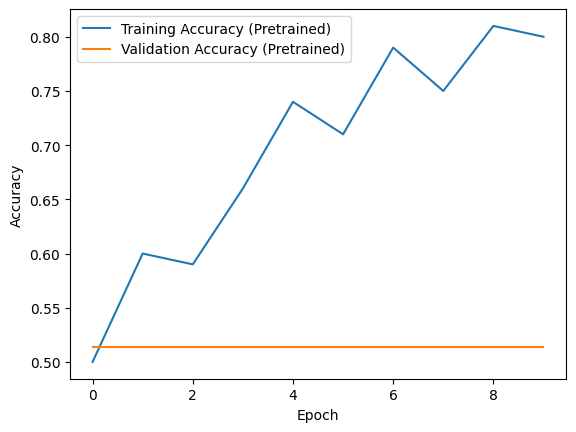

 
Loss : 
 


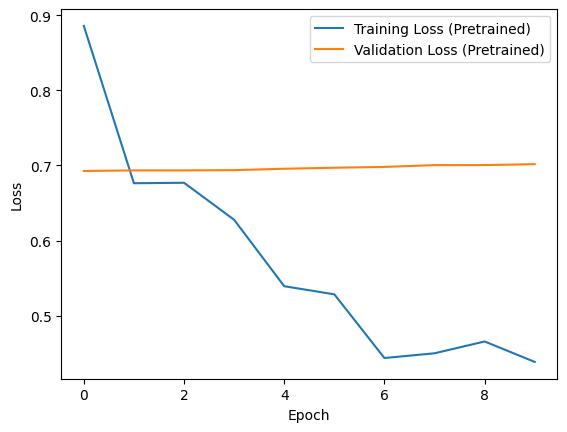

In [7]:
# Train the RNN model with pretrained embeddings
rnn_model_pretrained_100 = rnn_model_pretrained
rnn_history_pretrained_100 = rnn_model_pretrained_100.fit(train_data_100, train_labels_100, epochs=10, batch_size=32, validation_data=(val_data, val_labels))

# Evaluate the model on the test data
test_loss_pre_trained_rnn100, test_accuracy_pre_trained_rnn100 = rnn_model_pretrained_100.evaluate(test_data, test_labels)

print("Test Loss : ", test_loss_pre_trained_rnn100)
print("Test Accuracy : ", test_accuracy_pre_trained_rnn100)

# Plot training and validation accuracy
print("Perfomance of Pre Trained RNN Model for 100 Training Samples : ")
print(" ")
print("Accuracy : ")
print(" ")
plt.plot(rnn_history_pretrained_100.history['accuracy'], label='Training Accuracy (Pretrained)')
plt.plot(rnn_history_pretrained_100.history['val_accuracy'], label='Validation Accuracy (Pretrained)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(" ")
print("Loss : ")
print(" ")
# Plot training and validation loss
plt.plot(rnn_history_pretrained_100.history['loss'], label='Training Loss (Pretrained)')
plt.plot(rnn_history_pretrained_100.history['val_loss'], label='Validation Loss (Pretrained)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


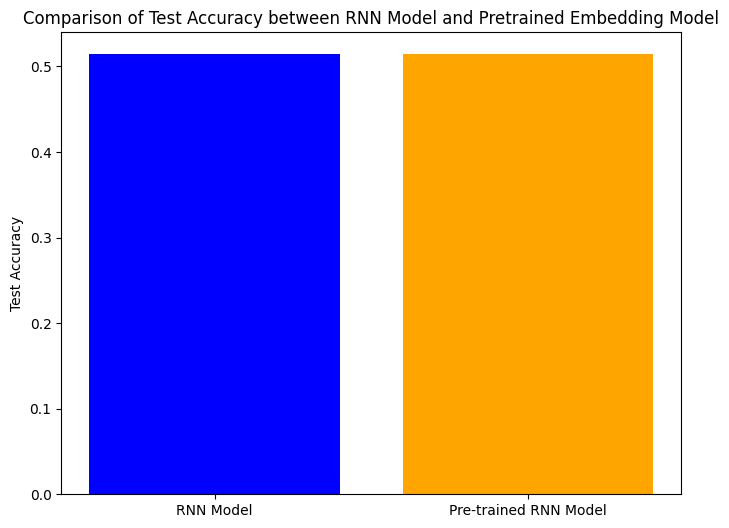

In [8]:
# Model names for labeling
model_names = ['RNN Model', 'Pre-trained RNN Model']

# Plot comparison graph
plt.figure(figsize=(8, 6))
plt.bar(model_names, [test_accuracy_rnn100, test_accuracy_pre_trained_rnn100], color=['blue', 'orange'])
plt.title('Comparison of Test Accuracy between RNN Model and Pretrained Embedding Model')
plt.ylabel('Test Accuracy')
plt.show()

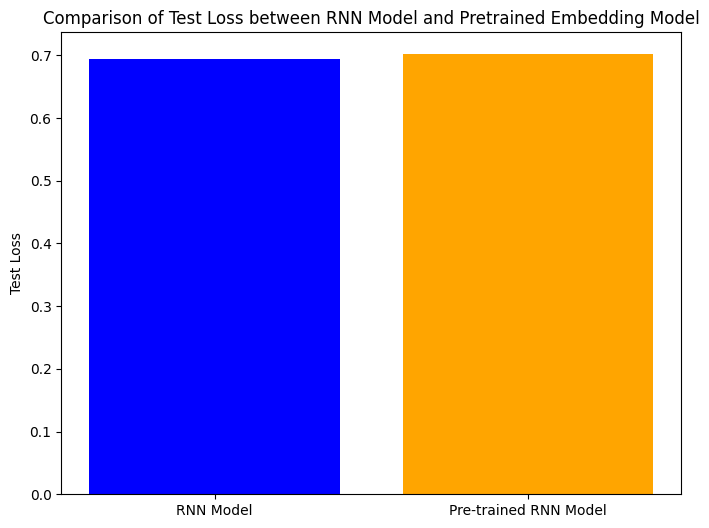

In [9]:
# Model names for labeling
model_names = ['RNN Model', 'Pre-trained RNN Model']

# Plot comparison graph
plt.figure(figsize=(8, 6))
plt.bar(model_names, [test_loss_rnn100, test_loss_pre_trained_rnn100], color=['blue', 'orange'])
plt.title('Comparison of Test Loss between RNN Model and Pretrained Embedding Model')
plt.ylabel('Test Loss')
plt.show()

# **For Training Samples 500**

In [10]:
# Select the first 500 samples for training
train_data_500 = train_data[:500]
train_labels_500 = train_labels[:500]

Epoch 1/10
16/16 [==============================] - 4s 284ms/step - loss: 0.7726 - accuracy: 0.6380 - val_loss: 0.6918 - val_accuracy: 0.5142
Epoch 2/10
16/16 [==============================] - 5s 302ms/step - loss: 0.3197 - accuracy: 0.8540 - val_loss: 0.6749 - val_accuracy: 0.5336
Epoch 3/10
16/16 [==============================] - 5s 310ms/step - loss: 0.1302 - accuracy: 0.9680 - val_loss: 0.6603 - val_accuracy: 0.6214
Epoch 4/10
16/16 [==============================] - 5s 346ms/step - loss: 0.0534 - accuracy: 0.9920 - val_loss: 0.6421 - val_accuracy: 0.6960
Epoch 5/10
16/16 [==============================] - 3s 192ms/step - loss: 0.0449 - accuracy: 0.9960 - val_loss: 0.6238 - val_accuracy: 0.6974
Epoch 6/10
16/16 [==============================] - 4s 245ms/step - loss: 0.0272 - accuracy: 0.9960 - val_loss: 0.6075 - val_accuracy: 0.6958
Epoch 7/10
16/16 [==============================] - 4s 235ms/step - loss: 0.0318 - accuracy: 0.9920 - val_loss: 0.7214 - val_accuracy: 0.5254
Epoch 

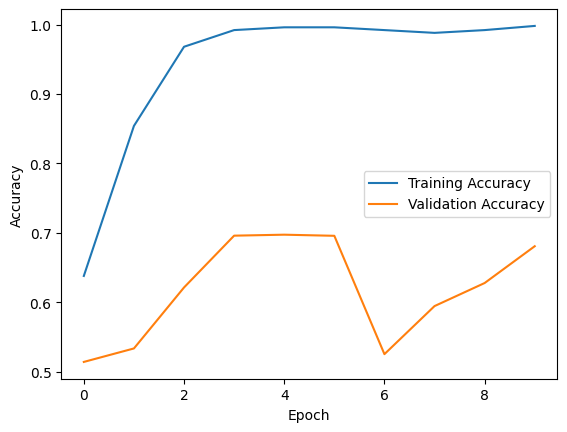

 
Loss : 
 


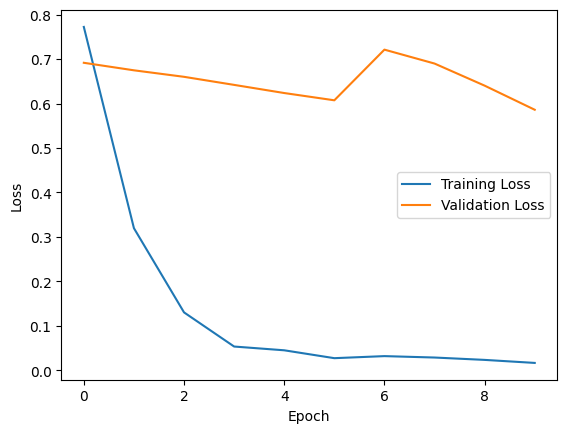

In [11]:
# Train the RNN model
rnn_model_500 = rnn_model
rnn_history_500 = rnn_model_500.fit(train_data_500, train_labels_500, epochs=10, batch_size=32, validation_data=(val_data, val_labels))

# Evaluate the model
test_loss_rnn500, test_accuracy_rnn500 = rnn_model_500.evaluate(test_data, test_labels)

print("Test Loss : ", test_loss_rnn500)
print("Test Accuracy : ", test_accuracy_rnn500)


#Model Perfomance Evaluation
print(" ")
print("Perfomance of RNN Model for 500 Training Samples : ")
print(" ")
# Plot training and validation accuracy
print("Accuracy : ")
print(" ")
plt.plot(rnn_history_500.history['accuracy'], label='Training Accuracy')
plt.plot(rnn_history_500.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
print(" ")
print("Loss : ")
print(" ")
plt.plot(rnn_history_500.history['loss'], label='Training Loss')
plt.plot(rnn_history_500.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/10
16/16 [==============================] - 2s 130ms/step - loss: 0.7135 - accuracy: 0.6280 - val_loss: 0.7019 - val_accuracy: 0.5142
Epoch 2/10
16/16 [==============================] - 2s 123ms/step - loss: 0.6688 - accuracy: 0.6620 - val_loss: 0.6950 - val_accuracy: 0.5142
Epoch 3/10
16/16 [==============================] - 3s 195ms/step - loss: 0.6255 - accuracy: 0.6980 - val_loss: 0.6883 - val_accuracy: 0.5208
Epoch 4/10
16/16 [==============================] - 3s 170ms/step - loss: 0.5785 - accuracy: 0.7060 - val_loss: 0.6835 - val_accuracy: 0.5666
Epoch 5/10
16/16 [==============================] - 3s 193ms/step - loss: 0.5428 - accuracy: 0.7320 - val_loss: 0.6819 - val_accuracy: 0.5856
Epoch 6/10
16/16 [==============================] - 3s 207ms/step - loss: 0.4500 - accuracy: 0.7760 - val_loss: 0.7145 - val_accuracy: 0.5154
Epoch 7/10
16/16 [==============================] - 3s 208ms/step - loss: 0.4312 - accuracy: 0.8000 - val_loss: 0.6793 - val_accuracy: 0.5608
Epoch 

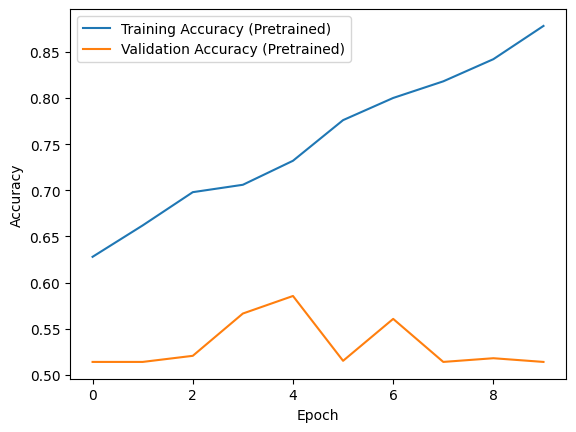

 
Loss : 
 


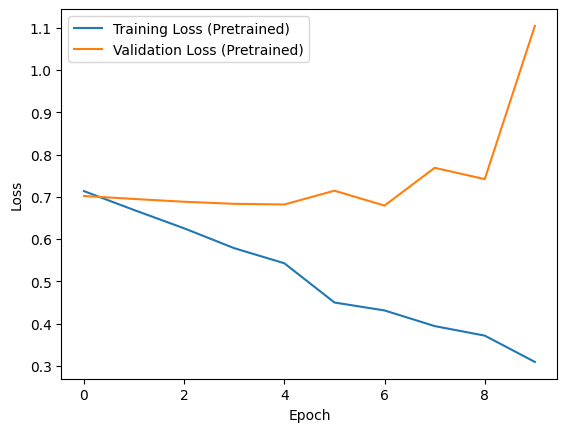

In [12]:
# Train the RNN model with pretrained embeddings
rnn_model_pretrained_500 = rnn_model_pretrained
rnn_history_pretrained_500 = rnn_model_pretrained_500.fit(train_data_500, train_labels_500, epochs=10, batch_size=32, validation_data=(val_data, val_labels))

# Evaluate the model on the test data
test_loss_pre_trained_rnn500, test_accuracy_pre_trained_rnn500 = rnn_model_pretrained_500.evaluate(test_data, test_labels)

print("Test Loss : ", test_loss_pre_trained_rnn500)
print("Test Accuracy : ", test_accuracy_pre_trained_rnn500)

# Plot training and validation accuracy
print("Perfomance of Pre Trained RNN Model for 500 Training Samples : ")
print(" ")
print("Accuracy : ")
print(" ")
plt.plot(rnn_history_pretrained_500.history['accuracy'], label='Training Accuracy (Pretrained)')
plt.plot(rnn_history_pretrained_500.history['val_accuracy'], label='Validation Accuracy (Pretrained)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(" ")
print("Loss : ")
print(" ")
# Plot training and validation loss
plt.plot(rnn_history_pretrained_500.history['loss'], label='Training Loss (Pretrained)')
plt.plot(rnn_history_pretrained_500.history['val_loss'], label='Validation Loss (Pretrained)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

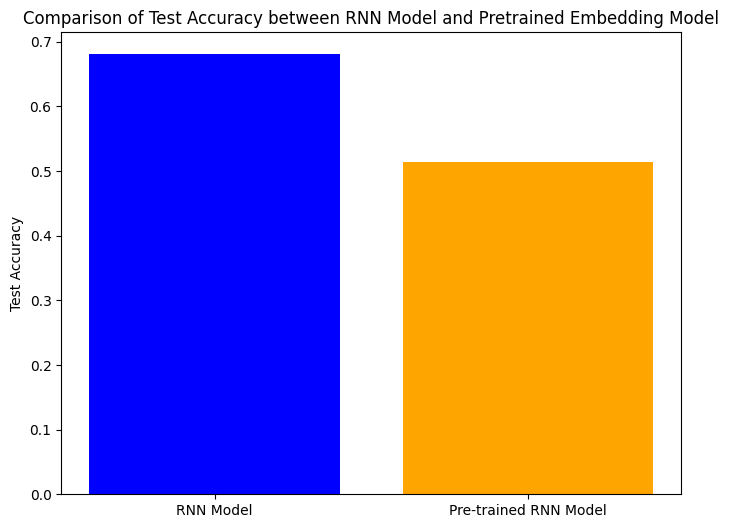

In [13]:
# Model names for labeling
model_names = ['RNN Model', 'Pre-trained RNN Model']

# Plot comparison graph
plt.figure(figsize=(8, 6))
plt.bar(model_names, [test_accuracy_rnn500, test_accuracy_pre_trained_rnn500], color=['blue', 'orange'])
plt.title('Comparison of Test Accuracy between RNN Model and Pretrained Embedding Model')
plt.ylabel('Test Accuracy')
plt.show()

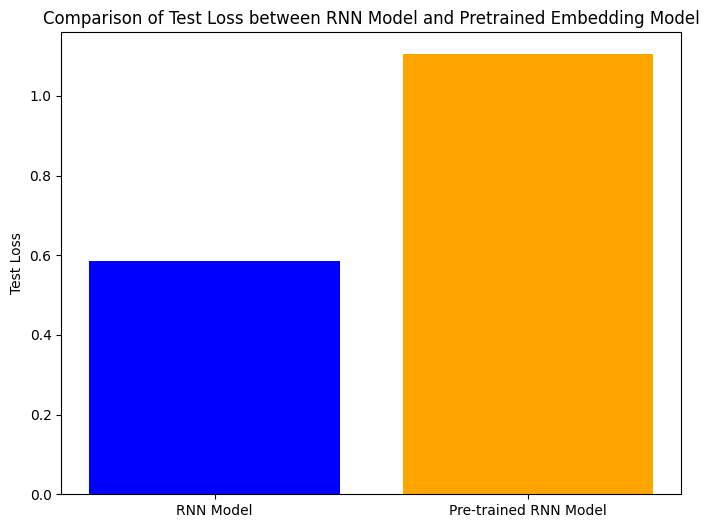

In [14]:
# Model names for labeling
model_names = ['RNN Model', 'Pre-trained RNN Model']

# Plot comparison graph
plt.figure(figsize=(8, 6))
plt.bar(model_names, [test_loss_rnn500, test_loss_pre_trained_rnn500], color=['blue', 'orange'])
plt.title('Comparison of Test Loss between RNN Model and Pretrained Embedding Model')
plt.ylabel('Test Loss')
plt.show()

# **For 1000 Training Samples**

In [15]:
# Select the first 1000 samples for training
train_data_1000 = train_data[:1000]
train_labels_1000 = train_labels[:1000]

Epoch 1/10
32/32 [==============================] - 4s 119ms/step - loss: 0.4581 - accuracy: 0.8370 - val_loss: 1.9968 - val_accuracy: 0.4866
Epoch 2/10
32/32 [==============================] - 3s 105ms/step - loss: 0.1766 - accuracy: 0.9380 - val_loss: 0.5325 - val_accuracy: 0.7544
Epoch 3/10
32/32 [==============================] - 5s 156ms/step - loss: 0.0621 - accuracy: 0.9800 - val_loss: 0.5263 - val_accuracy: 0.7304
Epoch 4/10
32/32 [==============================] - 5s 172ms/step - loss: 0.0343 - accuracy: 0.9890 - val_loss: 0.8264 - val_accuracy: 0.6352
Epoch 5/10
32/32 [==============================] - 6s 181ms/step - loss: 0.0508 - accuracy: 0.9810 - val_loss: 0.9472 - val_accuracy: 0.6376
Epoch 6/10
32/32 [==============================] - 4s 137ms/step - loss: 0.0186 - accuracy: 0.9960 - val_loss: 0.5887 - val_accuracy: 0.7536
Epoch 7/10
32/32 [==============================] - 3s 92ms/step - loss: 0.0224 - accuracy: 0.9940 - val_loss: 1.1188 - val_accuracy: 0.6734
Epoch 8

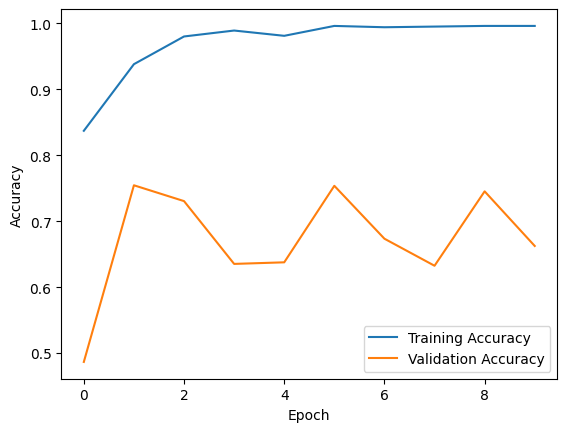

 
Loss : 
 


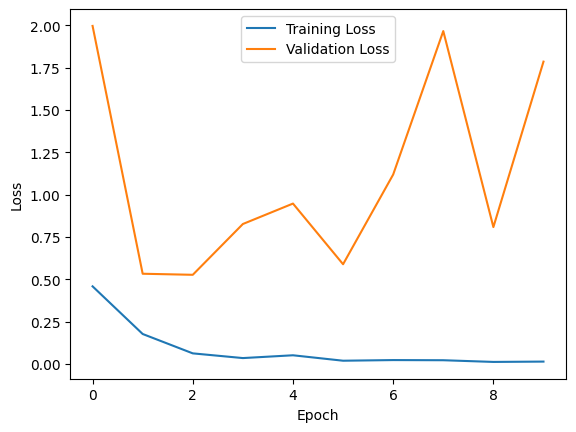

In [16]:
# Train the RNN model
rnn_model_1000 = rnn_model
rnn_history_1000 = rnn_model_1000.fit(train_data_1000, train_labels_1000, epochs=10, batch_size=32, validation_data=(val_data, val_labels))

# Evaluate the model
test_loss_rnn1000, test_accuracy_rnn1000 = rnn_model_1000.evaluate(test_data, test_labels)

print("Test Loss : ", test_loss_rnn1000)
print("Test Accuracy : ", test_accuracy_rnn1000)


#Model Perfomance Evaluation
print(" ")
print("Perfomance of RNN Model for 1000 Training Samples : ")
print(" ")
# Plot training and validation accuracy
print("Accuracy : ")
print(" ")
plt.plot(rnn_history_1000.history['accuracy'], label='Training Accuracy')
plt.plot(rnn_history_1000.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
print(" ")
print("Loss : ")
print(" ")
plt.plot(rnn_history_1000.history['loss'], label='Training Loss')
plt.plot(rnn_history_1000.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/10
32/32 [==============================] - 4s 122ms/step - loss: 0.6300 - accuracy: 0.7000 - val_loss: 0.9638 - val_accuracy: 0.5142
Epoch 2/10
32/32 [==============================] - 3s 106ms/step - loss: 0.5501 - accuracy: 0.7310 - val_loss: 0.7002 - val_accuracy: 0.5374
Epoch 3/10
32/32 [==============================] - 3s 107ms/step - loss: 0.5194 - accuracy: 0.7350 - val_loss: 0.9834 - val_accuracy: 0.5176
Epoch 4/10
32/32 [==============================] - 3s 106ms/step - loss: 0.4944 - accuracy: 0.7520 - val_loss: 1.1269 - val_accuracy: 0.5318
Epoch 5/10
32/32 [==============================] - 4s 120ms/step - loss: 0.4456 - accuracy: 0.7920 - val_loss: 1.1728 - val_accuracy: 0.5244
Epoch 6/10
32/32 [==============================] - 4s 113ms/step - loss: 0.4313 - accuracy: 0.8050 - val_loss: 0.7253 - val_accuracy: 0.6006
Epoch 7/10
32/32 [==============================] - 6s 202ms/step - loss: 0.3955 - accuracy: 0.8230 - val_loss: 0.8037 - val_accuracy: 0.5970
Epoch 

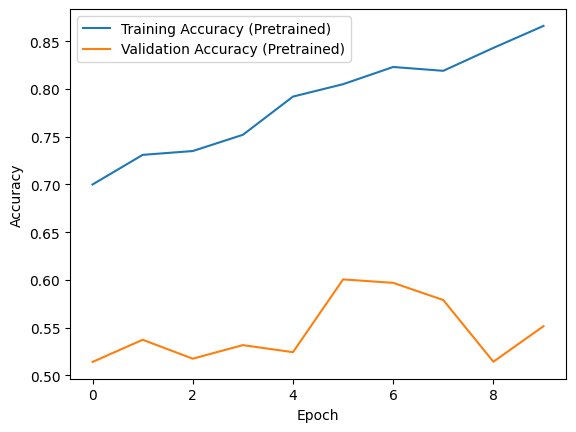

 
Loss : 
 


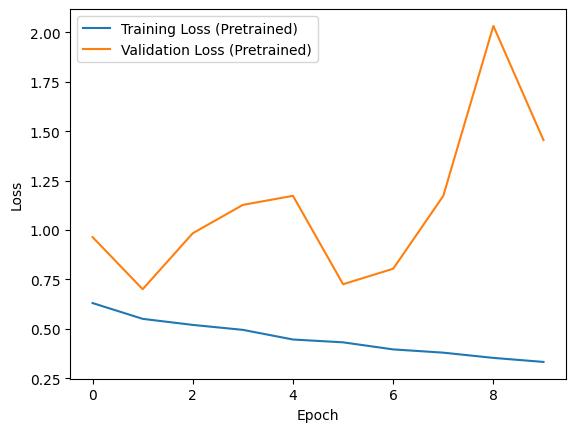

In [17]:
# Train the RNN model with pretrained embeddings
rnn_model_pretrained_1000 = rnn_model_pretrained
rnn_history_pretrained_1000 = rnn_model_pretrained_1000.fit(train_data_1000, train_labels_1000, epochs=10, batch_size=32, validation_data=(val_data, val_labels))

# Evaluate the model on the test data
test_loss_pre_trained_rnn1000, test_accuracy_pre_trained_rnn1000 = rnn_model_pretrained_1000.evaluate(test_data, test_labels)

print("Test Loss : ", test_loss_pre_trained_rnn1000)
print("Test Accuracy : ", test_accuracy_pre_trained_rnn1000)

# Plot training and validation accuracy
print("Perfomance of Pre Trained RNN Model for 1000 Training Samples : ")
print(" ")
print("Accuracy : ")
print(" ")
plt.plot(rnn_history_pretrained_1000.history['accuracy'], label='Training Accuracy (Pretrained)')
plt.plot(rnn_history_pretrained_1000.history['val_accuracy'], label='Validation Accuracy (Pretrained)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(" ")
print("Loss : ")
print(" ")
# Plot training and validation loss
plt.plot(rnn_history_pretrained_1000.history['loss'], label='Training Loss (Pretrained)')
plt.plot(rnn_history_pretrained_1000.history['val_loss'], label='Validation Loss (Pretrained)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

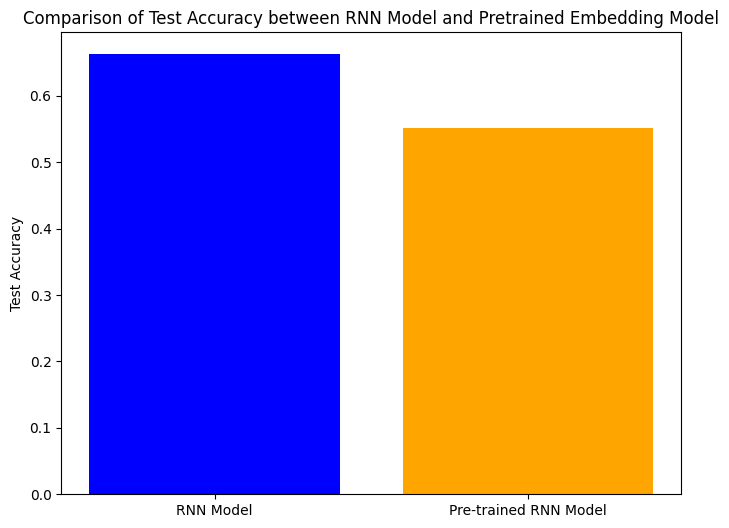

In [18]:
# Model names for labeling
model_names = ['RNN Model', 'Pre-trained RNN Model']

# Plot comparison graph
plt.figure(figsize=(8, 6))
plt.bar(model_names, [test_accuracy_rnn1000, test_accuracy_pre_trained_rnn1000], color=['blue', 'orange'])
plt.title('Comparison of Test Accuracy between RNN Model and Pretrained Embedding Model')
plt.ylabel('Test Accuracy')
plt.show()

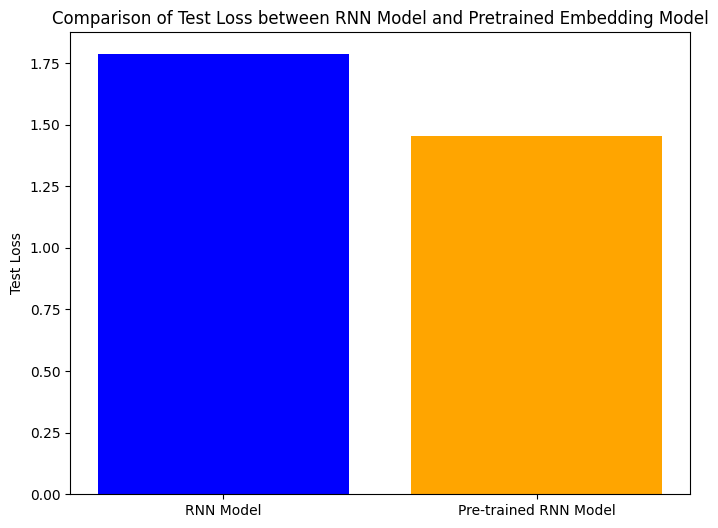

In [19]:
# Model names for labeling
model_names = ['RNN Model', 'Pre-trained RNN Model']

# Plot comparison graph
plt.figure(figsize=(8, 6))
plt.bar(model_names, [test_loss_rnn1000, test_loss_pre_trained_rnn1000], color=['blue', 'orange'])
plt.title('Comparison of Test Loss between RNN Model and Pretrained Embedding Model')
plt.ylabel('Test Loss')
plt.show()